In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

In [2]:
# define the function for exact solution
def f(t_n):
    return np.exp(t_n)

In [3]:
# define the function for numerical solution
def f_n(t,y):
    return y

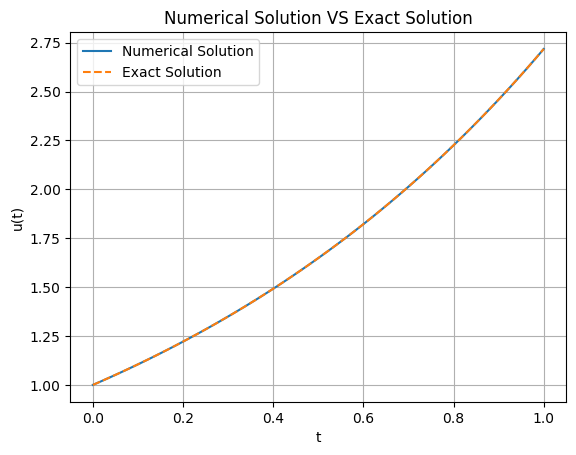

In [4]:
y0 = 1
y1 = np.exp(0.01)   # delta_t = 0.01
n = int(1/0.01)
approx_list = [1,np.exp(0.01)]
t = 0
for i in range(n-1):
    y = 3/2*y1 - 1/2*y0 + 0.01*(5/4*f_n(t+0.01,y1) - 3/4*f_n(t,y0))
    approx_list.append(y)
    y0 = y1
    y1 = y
    t += 0.01
    
accurate_list = []
t = 0
for i in range(n+1):
    acc_value = f(t)
    accurate_list.append(acc_value)
    t += 0.01

x_axis = np.linspace(0,1,n+1)
plt.plot(x_axis, approx_list, label='Numerical Solution')
plt.plot(x_axis, accurate_list, label='Exact Solution', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Numerical Solution VS Exact Solution')
plt.show()

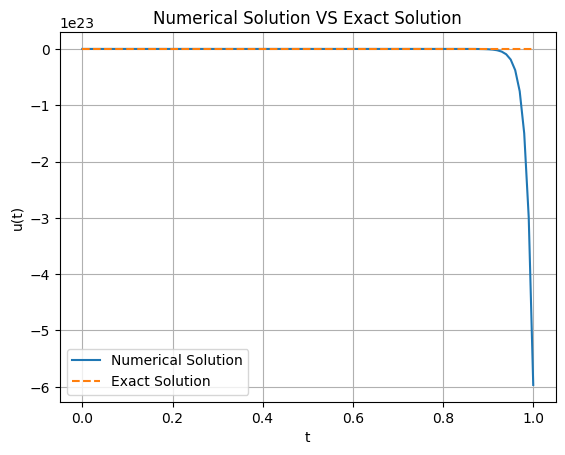

In [5]:
y_0 = 1
y_1 = np.exp(0.01)   # delta_t = 0.01
n = int(1/0.01)
approx_list = [1,np.exp(0.01)]
t = 0
for i in range(n-1):
    y = 3*y_1 - 2*y_0 + 0.01*((1/2)*f_n(t+0.01,y_1) - (3/2)*f_n(t,y_0))
    approx_list.append(y)
    y_0 = y_1
    y_1 = y
    t += 0.01

accurate_list = []
t = 0
for i in range(n+1):
    acc_value = f(t)
    accurate_list.append(acc_value)
    t += 0.01

x_axis = np.linspace(0,1,n+1)
plt.plot(x_axis, approx_list, label='Numerical Solution')
plt.plot(x_axis, accurate_list, label='Exact Solution', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Numerical Solution VS Exact Solution')
plt.show()

#### The distinction between these two methods lies in their zero stability. Zero stability refers to the ability of a numerical method to remain stable even when the initial data is slightly perturbed. A zero-stable method produces a solution that remains close to the true solution despite small perturbations in the initial data.
#### In our problem, the first method (part a) may be more stable than the second method (part b), resulting in less sensitivity to small perturbations in the initial data. This can lead to improved accuracy and a closer approximation to the exact solution. Conversely, the less stable second method may produce a solution that deviates further from the exact solution.

### Problem 2

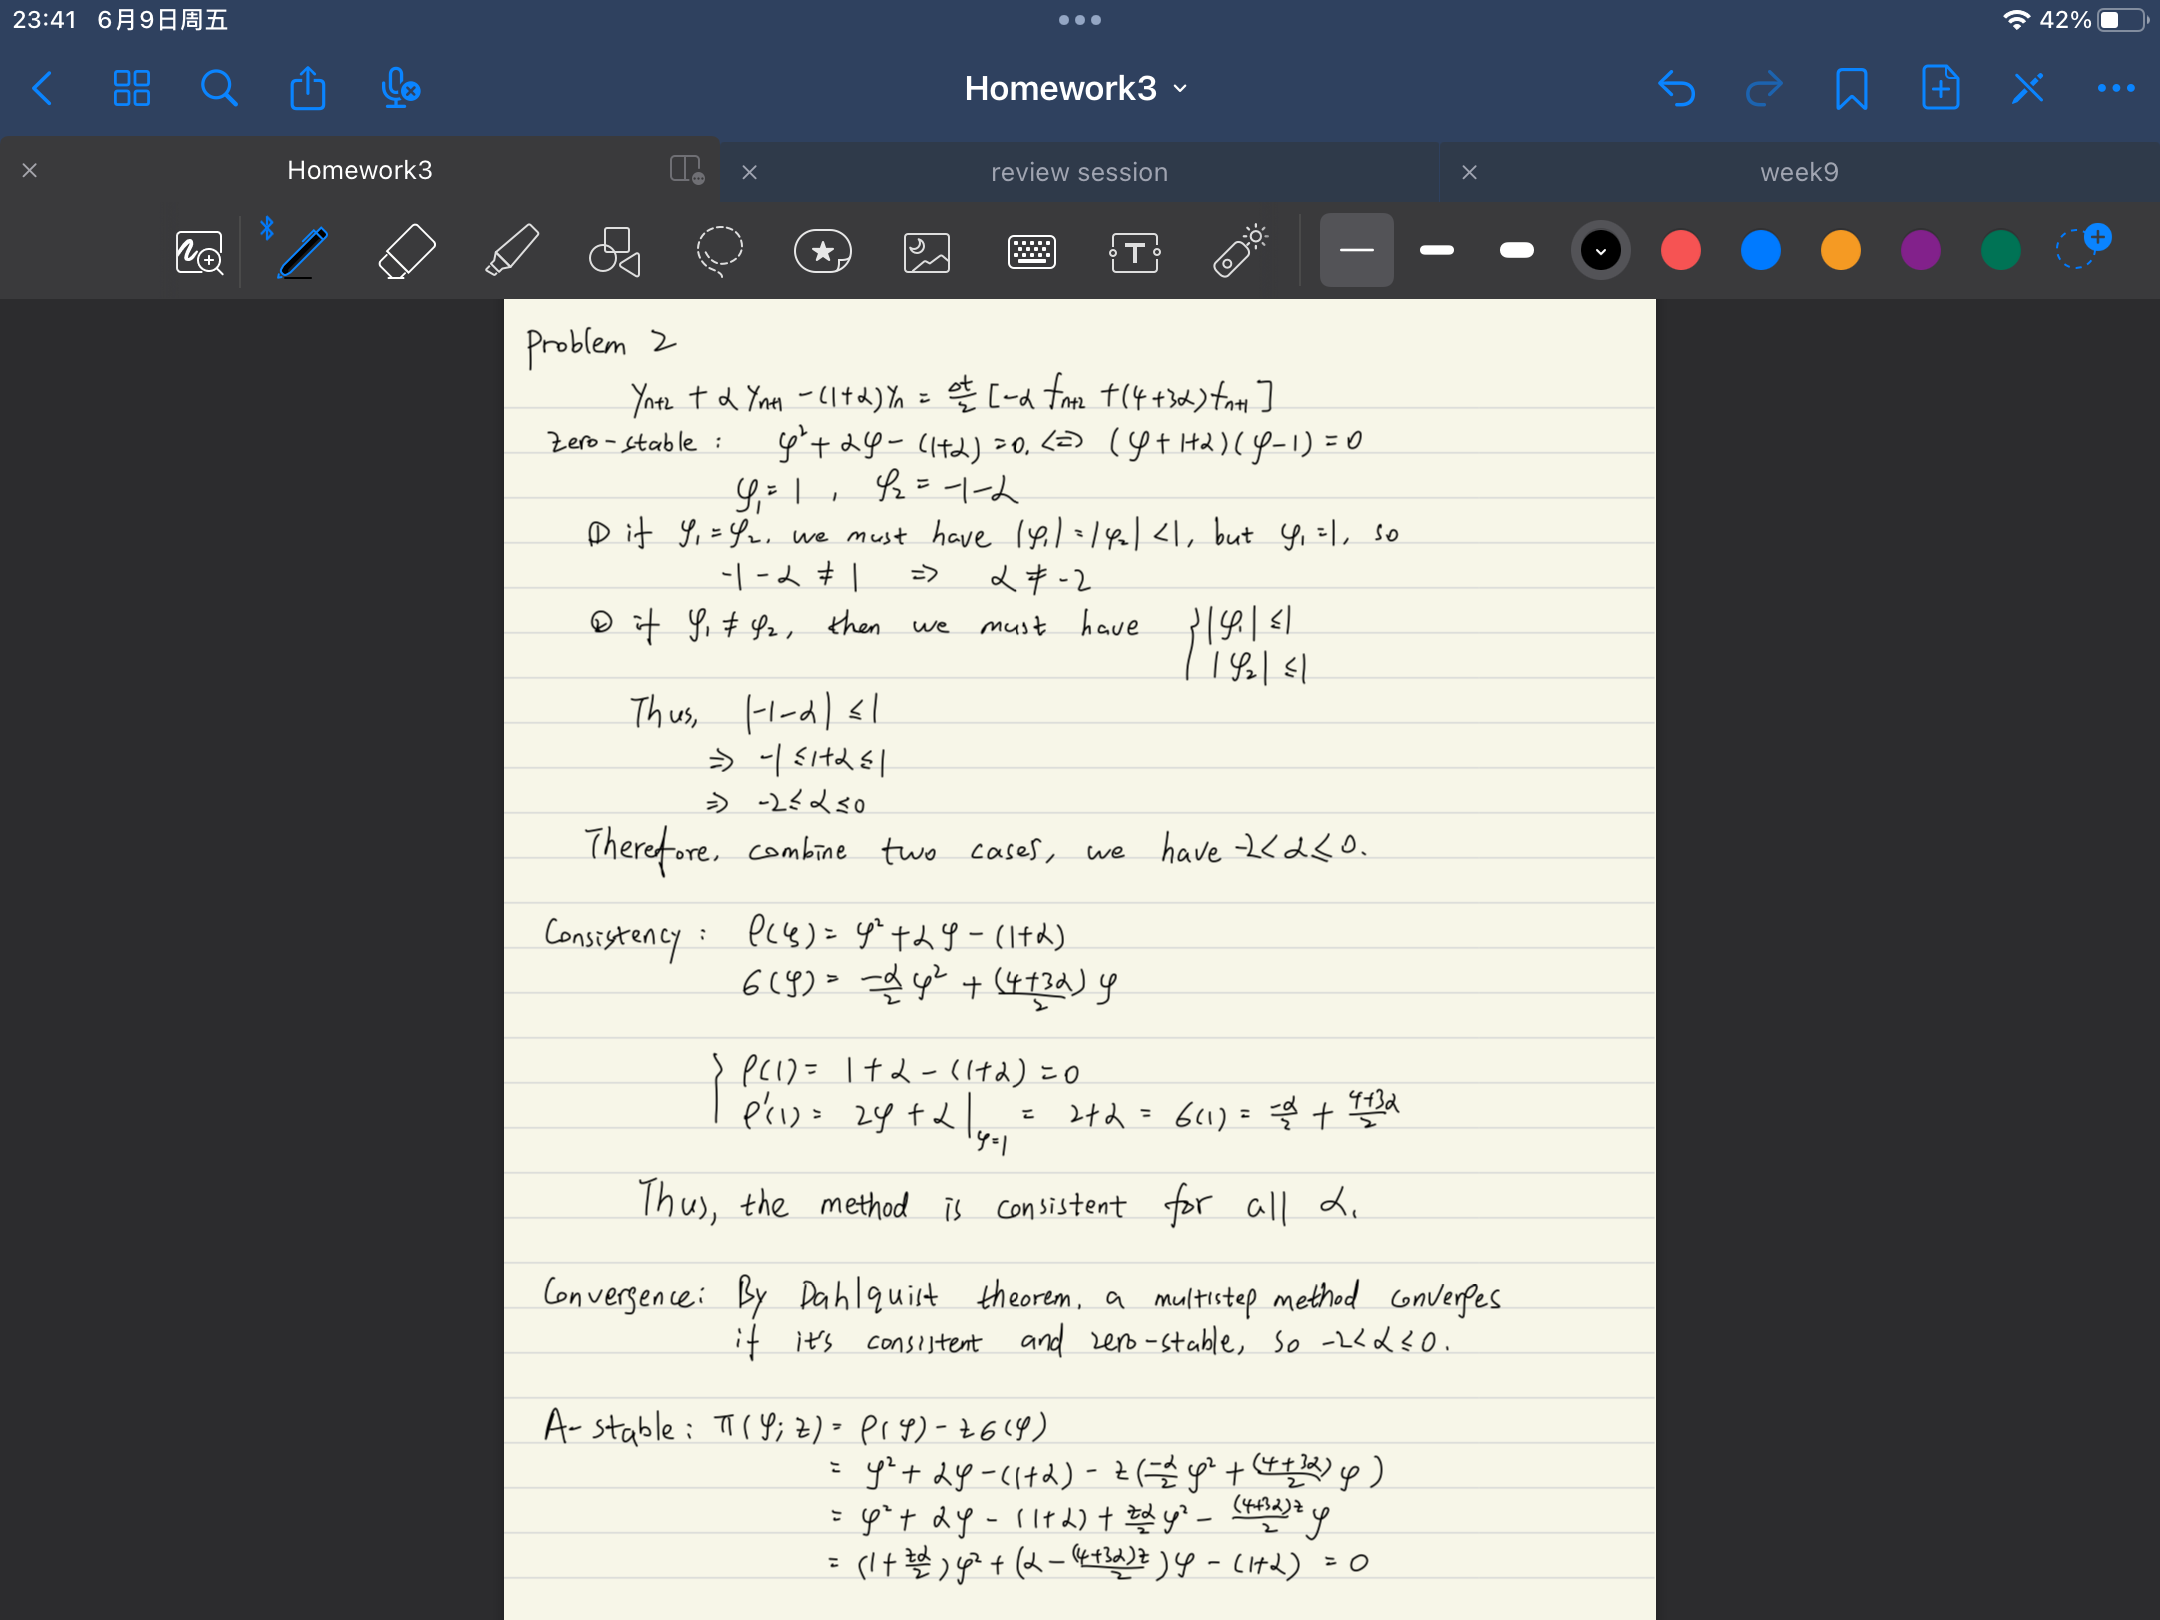

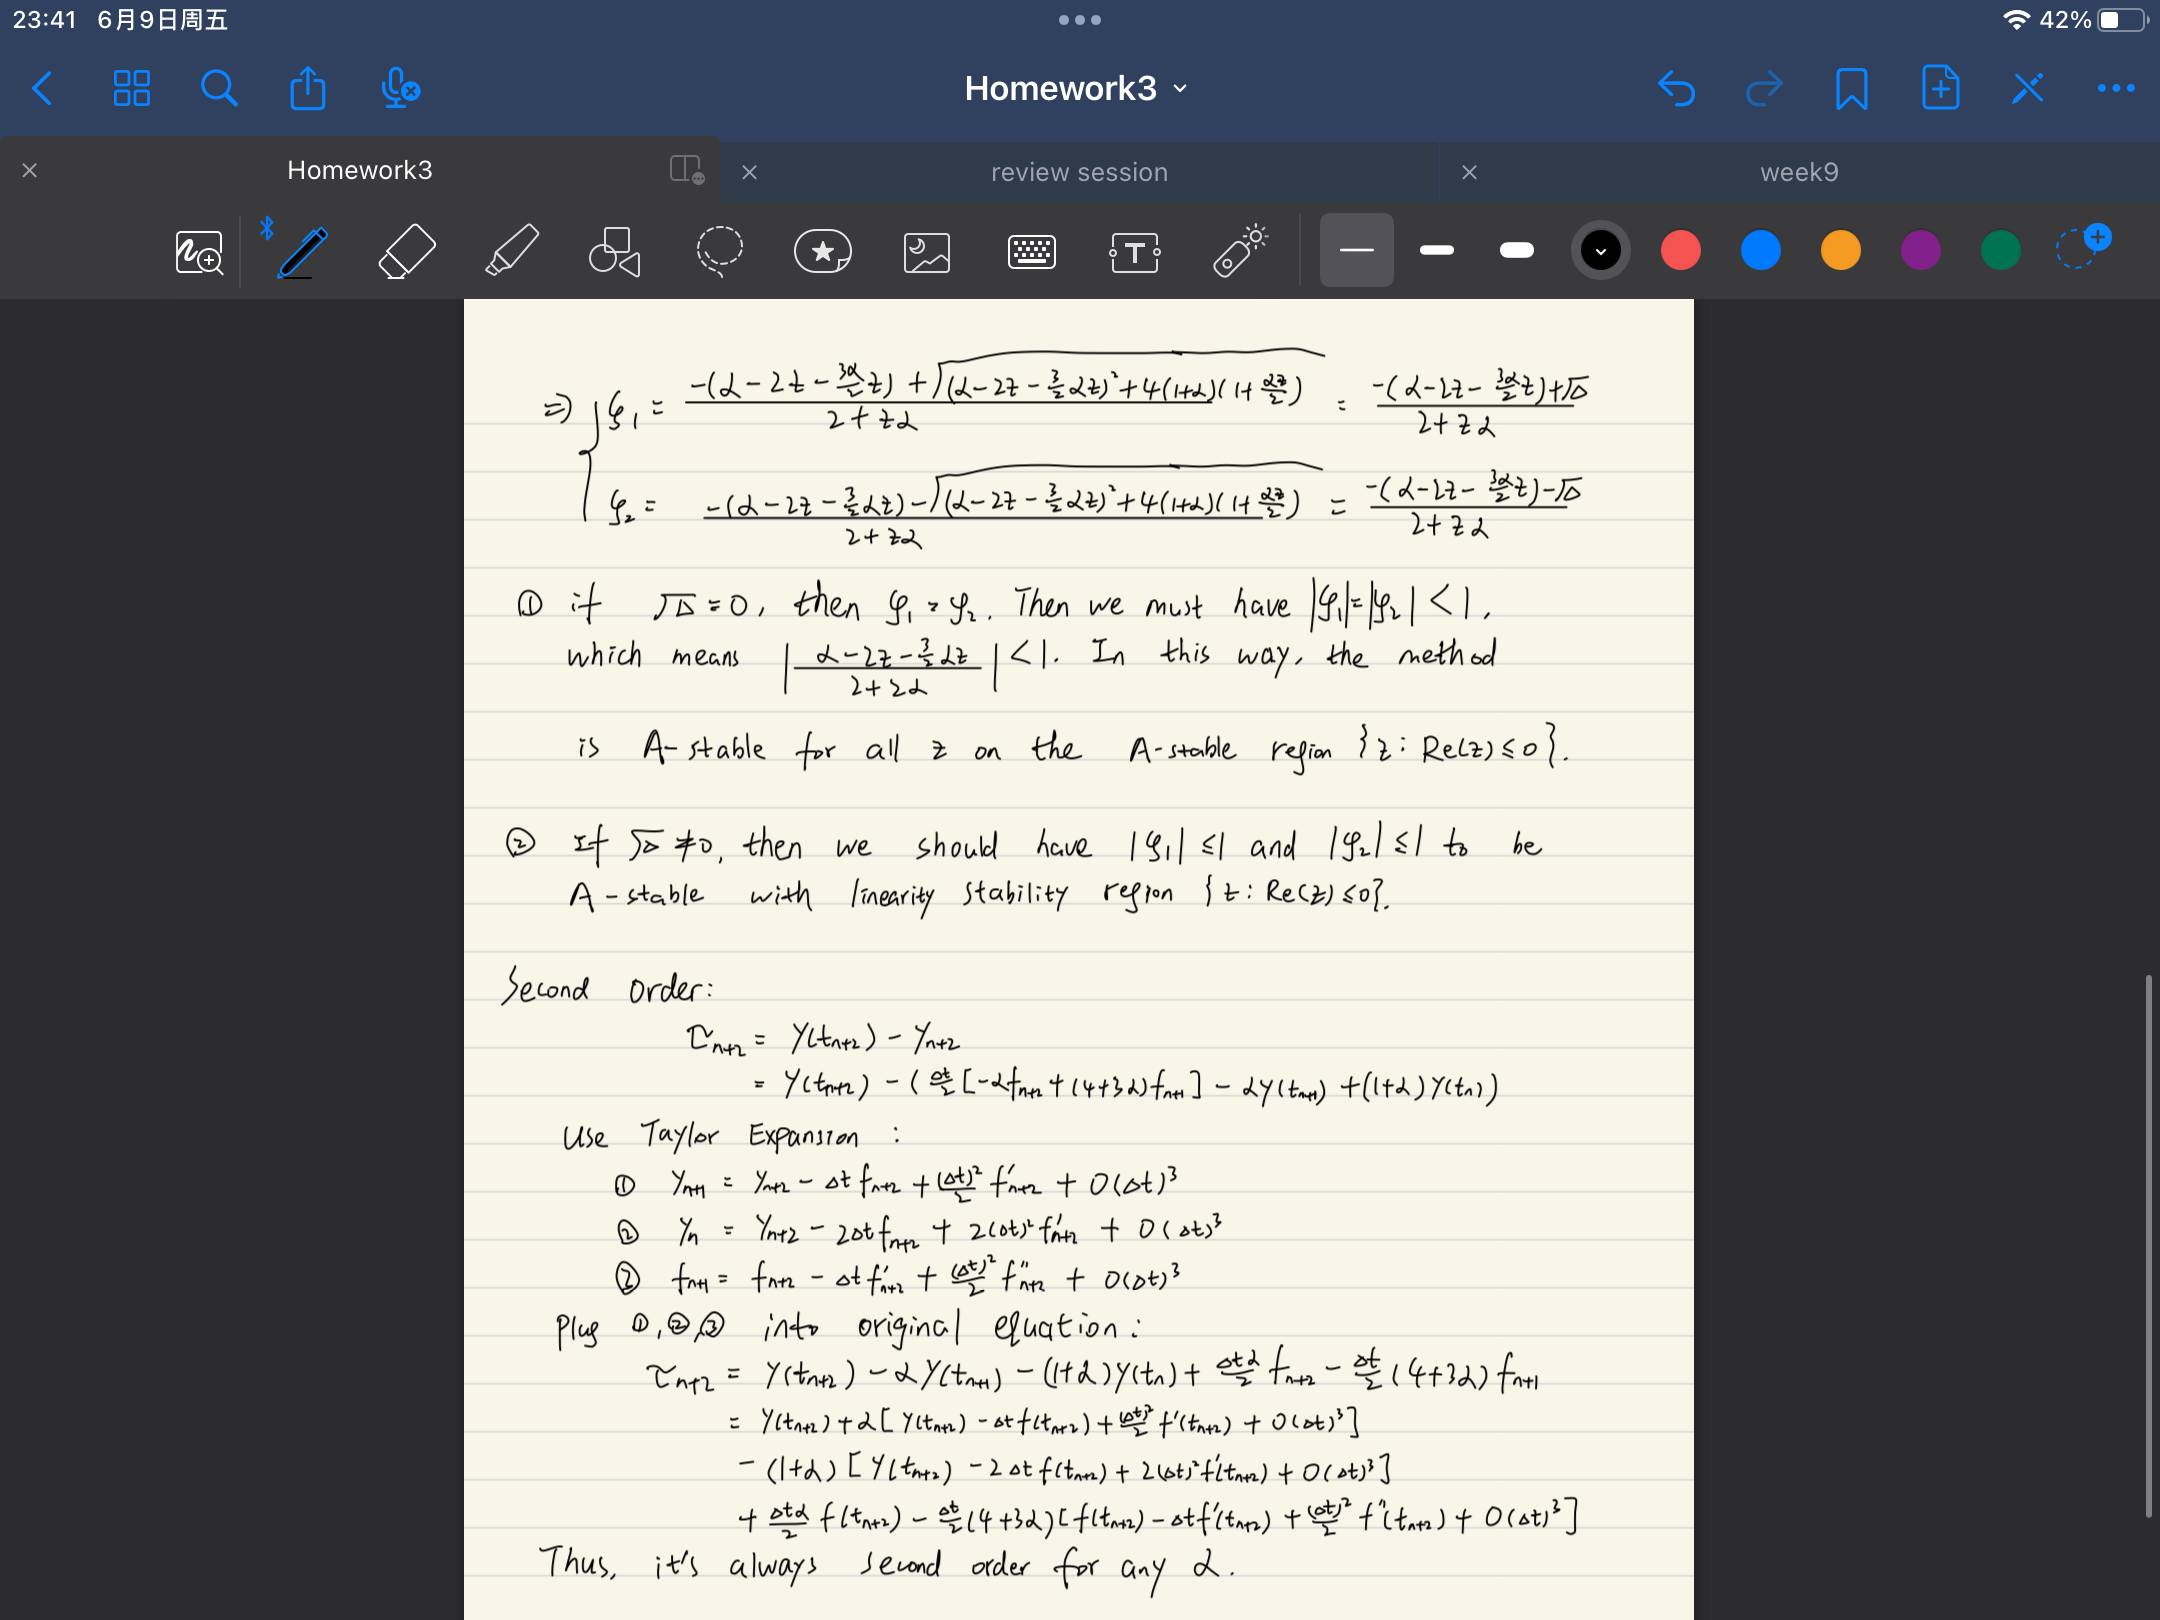

### Problem 3

#### Forward Euler

In [40]:
def forward(n, k, m):
    h = 2/(n+1)
    s = k/(h**2)
    w_list = []
    for i in range(n+2):
        g = np.exp(-100*((-1+i*h)**2))
        w_list.append(g)

    for j in range(1,m+1):
        v0 = 0
        v_last = 0
        v_list = [v0]
        for i in range(1,n+1):
            vi = s*w_list[i-1]+(1-2*s)*w_list[i]+s*w_list[i+1]
            v_list.append(vi)
        v_list.append(v_last)
        for k in range(1,n+1):
              w_list[k] = v_list[k]
    return v_list


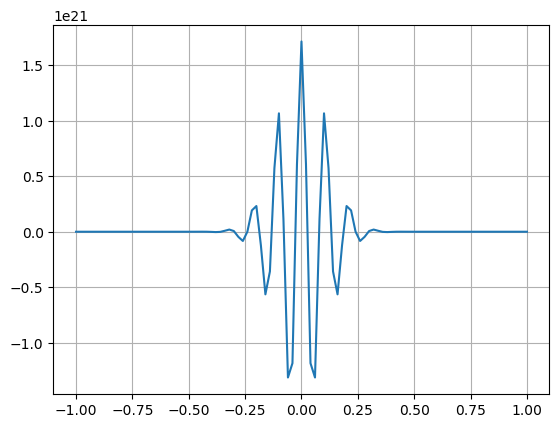

In [43]:
# Plot the solution for u(1,x) when delta_t = 0.1 and delta_x = 0.02.
v_list = forward(99,0.1,10)
x_axis = np.linspace(-1,1,101)
plt.plot(x_axis,v_list)
plt.grid()
plt.show()

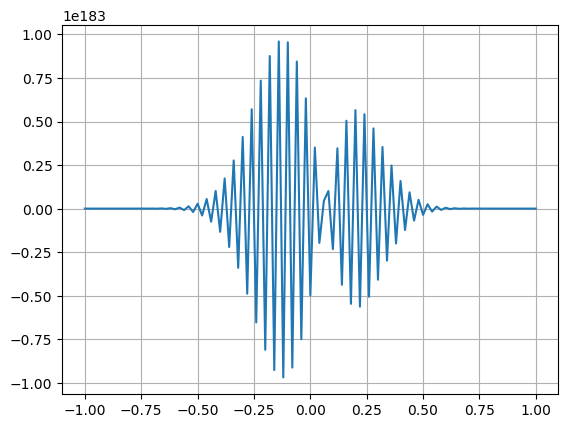

In [44]:
# Plot the solution for u(1,x) when delta_t = 0.01 and delta_x = 0.02.
v_list = forward(99,0.01,100)
x_axis = np.linspace(-1,1,101)
plt.plot(x_axis,v_list)
plt.grid()
plt.show()

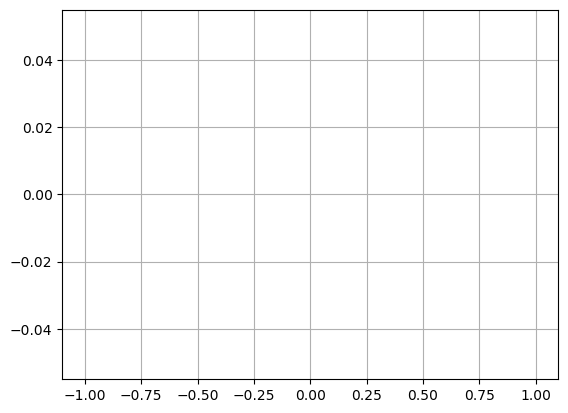

In [45]:
# Plot the solution for u(1,x) when delta_t = 0.001 and delta_x = 0.02.
v_list = forward(99,0.001,1000)
x_axis = np.linspace(-1,1,101)
plt.plot(x_axis,v_list)
plt.grid()
plt.show()

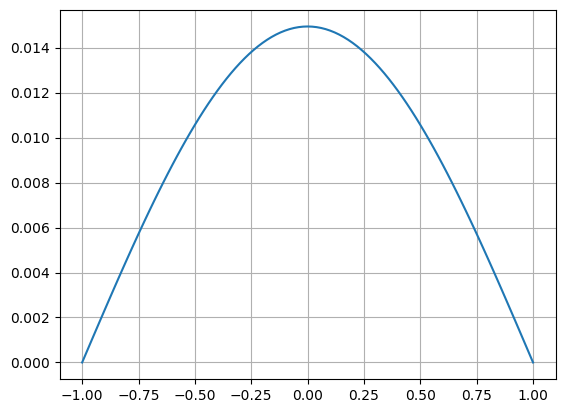

In [46]:
# Plot the solution for u(1,x) when delta_t = 0.0001 and delta_x = 0.02.
v_list = forward(99,0.0001,10000)
x_axis = np.linspace(-1,1,101)
plt.plot(x_axis,v_list)
plt.grid()
plt.show()

#### The Forward Euler Method is not unconditionally stable, and the Local Truncation Error is of the first order. This explicit technique computes the subsequent solution solely based on the existing one, which makes it simple to implement and computationally effective. However, a primary disadvantage of this method is its conditional stability. If the time step size is not reasonable, such as it is a little bit big, then the method may become unstable, leading to an explosive or oscillating solution. 
#### For a delta_t = 0.1, we get a stability value of 250. Similarly, for delta_t = 0.01, s = 25; for delta_t = 0.001, s = 2.5; and for delta_t = 0.0001, s = 0.25. Since the stability value falls below 1/2 for a delta_t = 0.0001, the Forward Euler Method demonstrates stability only in the final graph. Furthermore, as the time step size reduces, the accuracy of numerical solutions improves, drawing nearer to the exact solutions due to the first-order local truncation error.

#### Backward Euler

In [49]:
def tri(n,s,v):
    c = (-s)*np.ones(n-1)     # subdiagonal
    d = (1 + 2*s)*np.ones(n) # d is the main diagonal
    a = (-s)*np.ones(n-1)    # superdiagonal
# Combine the superdiagonal, main diagonal, and subdiagonal to form the tridiagonal matrix A and solve the problem
    A = np.diag(d,0)+np.diag(a,1)+np.diag(c,-1) 
    x = np.linalg.solve(A, v) #Ax=v
    return x

def backward(n,k,m):
    h = 2/(n+1)
    s = k/(h**2)
    v = []
    for i in range (0,n):
        g = np.exp(-100*((-1+i*h)**2))
        v.append(g)
    t = 0

    for j in range (m):         
        v = tri(n,s,v)
    
    v = np.insert(v,0,0)
    v = np.append(v,0)
        
    return v

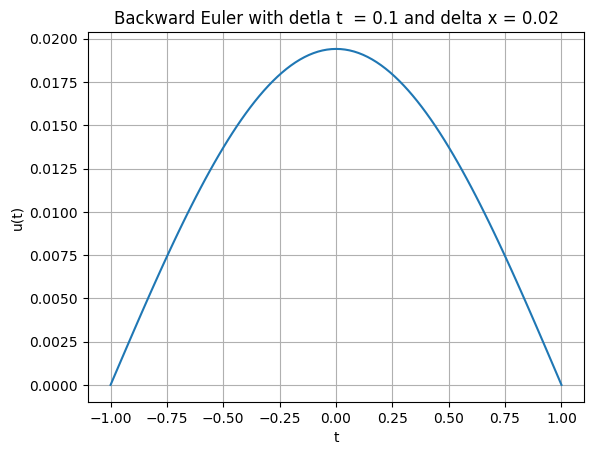

In [50]:
t = np.linspace(-1,1,101)
v = backward(99, 0.1, 10)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.title('Backward Euler with detla t  = 0.1 and delta x = 0.02')
plt.show()

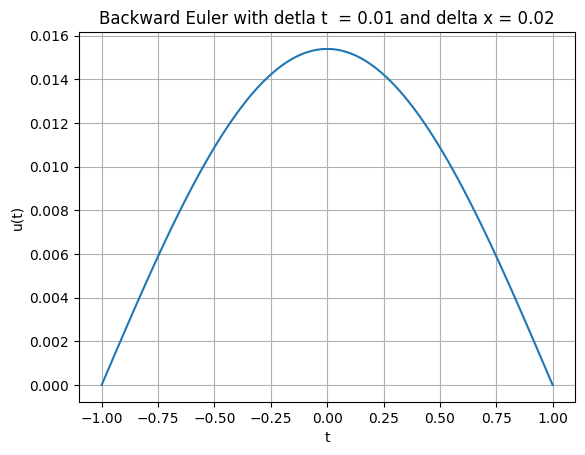

In [51]:
t = np.linspace(-1,1,101)
v = backward(99, 0.01, 100)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.title('Backward Euler with detla t  = 0.01 and delta x = 0.02')
plt.show()

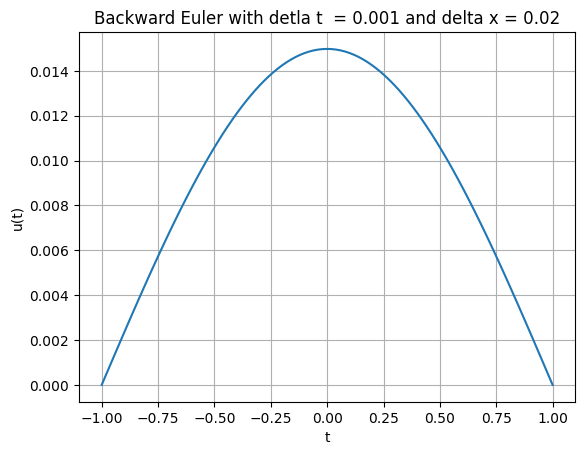

In [52]:
t = np.linspace(-1,1,101)
v = backward(99, 0.001, 1000)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.title('Backward Euler with detla t  = 0.001 and delta x = 0.02')
plt.show()

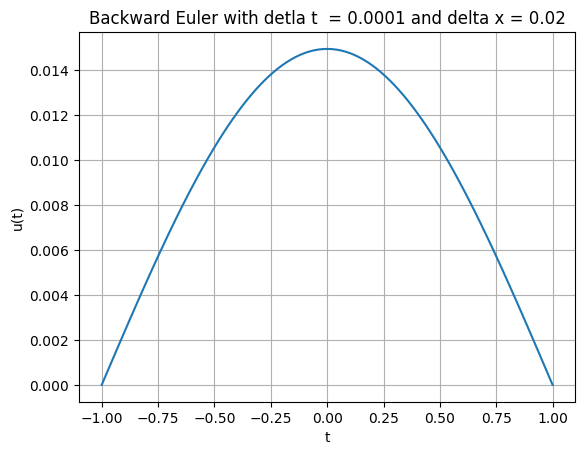

In [53]:
t = np.linspace(-1,1,101)
v = backward(99, 0.0001, 10000)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.title('Backward Euler with detla t  = 0.0001 and delta x = 0.02')
plt.show()

#### The Backward Euler Method is A-stable and its Local Truncation Error is of the first order. This method is implicit, so it requires the solution of an equation at each stage of computation. This makes it more computationally demanding than the Forward Euler method. Nevertheless, its crucial benefit is its unconditional stability, guaranteeing its convergence irrespective of the size of the time step. Therefore, all four Backward Euler Method graphs, each with different time step sizes, exhibit stability. Additionally, as the time step size decreases, it's evident that the numerical solutions become increasingly accurate, approaching the exact solutions.

### Crank-Nicolson

In [63]:
def tri(n,s,v):
    c = (-s)*np.ones(n-1)     # subdiagonal
    d = (2 + 2*s)*np.ones(n) # d is the main diagonal
    a = (-s)*np.ones(n-1)    # superdiagonal
# Combine the superdiagonal, main diagonal, and subdiagonal to form the tridiagonal matrix A and solve the problem
    A = np.diag(d,0)+np.diag(a,1)+np.diag(c,-1) 
    x = np.linalg.solve(A, v) #Ax=v
    return x

def crank_nicolson(n,k,m):
    h = 2/(n+1)
    s = k/(h**2)
    
    C_c = (s)*np.ones(n-1)     # subdiagonal
    C_d = (2 - 2*s)*np.ones(n) # d is the main diagonal
    C_a = (s)*np.ones(n-1)    # superdiagonal
# Combine the superdiagonal, main diagonal, and subdiagonal to form the tridiagonal matrix C and solve the problem
    C = np.diag(C_d,0)+np.diag(C_a,1)+np.diag(C_c,-1) 
    
    v = []
    for i in range (0,n):
        g = np.exp(-100*((-1+i*h)**2))
        v.append(g)
    t = 0
    

    for j in range (m):
        v = tri(n,s,v)
        v = np.dot(C,v)
    
    v = np.insert(v,0,0)
    v = np.append(v,0)
        
    return v

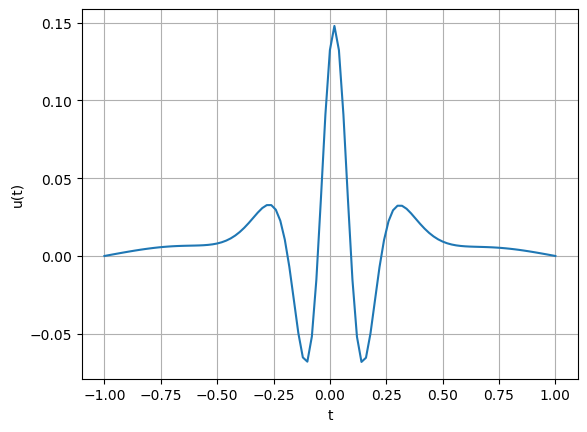

In [65]:
t = np.linspace(-1,1,101)
v = crank_nicolson(99, 0.1, 10)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.show()

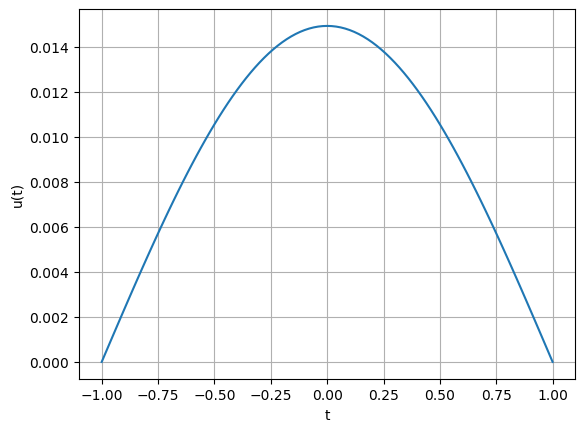

In [66]:
t = np.linspace(-1,1,101)
v = crank_nicolson(99, 0.01, 100)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.show()

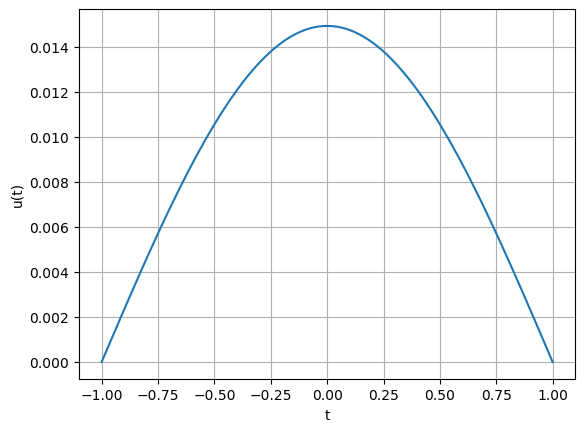

In [67]:
t = np.linspace(-1,1,101)
v = crank_nicolson(99, 0.001, 1000)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.show()

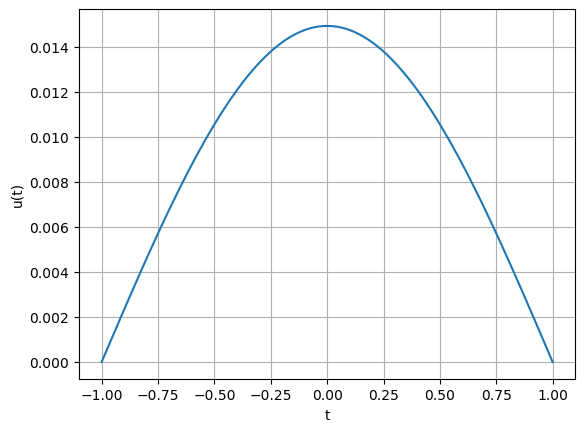

In [68]:
t = np.linspace(-1,1,101)
v = crank_nicolson(99, 0.0001, 10000)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.show()

#### The Crank-Nicolson Method is A-stable with a local truncation error of the second order. This technique is also implicit, but with a higher-order compared to Euler's, and thus, generally more precise given the same time step. It shares the characteristic of unconditional stability with the Backward Euler method. As demonstrated in the graphs, this explains why the numerical solution obtained through the Crank-Nicolson Method with delta_t = 0.01 exhibits more accuracy than the solution achieved through the Backward Euler Method with the same delta_t. Therefore, when compared to the other two methods, this method offers a significantly more precise approximation of the exact solution. Furthermore, despite the first graph displaying oscillation due to the particular features of the PDE problem, the remaining three graphs derived from the Crank-Nicolson Method are stable. Certain problems, particularly those with steep gradients or discontinuities, can cause this method to show numerical oscillations. While these oscillations might suggest instability in a practical context, from a numerical analysis viewpoint, the method remains stable.